In [1]:
import tensorflow as tf
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt
from keras import callbacks

2024-03-06 07:21:12.887122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 07:21:12.887215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 07:21:13.019993: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_dir = "/kaggle/input/eccv-brain-mri-augmentation-manual/original_dataset/"

# Define a range for the validation split
validation_splits = [0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40]

accuracies = []

for validation_split in validation_splits:
    print(f"Training with validation split: {validation_split}")

    # Create the image dataset with the current validation split
    train_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split = validation_split,
      subset="training",
      seed=123,
      image_size=(224,224)
      )

    val_ds = tf.keras.utils.image_dataset_from_directory(
      data_dir,
      validation_split = validation_split,
      subset="validation",
      seed=123,
      image_size=(224,224)
      )
    earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                            mode="min", patience=5,
                                            restore_best_weights=True)

    model = models.Sequential()
    model.add(Rescaling(scale=1.0 / 255.0, input_shape=(224, 224, 3)))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[earlystopping])
    
    accuracy = history.history['val_accuracy'][-1]
    accuracies.append(accuracy)
    print(f"Overall accuracy: {accuracy}")

Training with validation split: 0.1
Found 3027 files belonging to 4 classes.
Using 2725 files for training.
Found 3027 files belonging to 4 classes.
Using 302 files for validation.
Epoch 1/5


I0000 00:00:1709709693.112677      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 [==============================] - 12s 76ms/step - loss: 1.2181 - accuracy: 0.5809 - val_loss: 0.8317 - val_accuracy: 0.6424
Epoch 2/5
86/86 [==============================] - 4s 48ms/step - loss: 0.5588 - accuracy: 0.7809 - val_loss: 0.5816 - val_accuracy: 0.7881
Epoch 3/5
86/86 [==============================] - 4s 47ms/step - loss: 0.2664 - accuracy: 0.9057 - val_loss: 0.4863 - val_accuracy: 0.8344
Epoch 4/5
86/86 [==============================] - 4s 47ms/step - loss: 0.1359 - accuracy: 0.9538 - val_loss: 0.5595 - val_accuracy: 0.8146
Epoch 5/5
86/86 [==============================] - 4s 47ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.7525 - val_accuracy: 0.8113
Overall accuracy: 0.8112582564353943
Training with validation split: 0.11
Found 3027 files belonging to 4 classes.
Using 2695 files for training.
Found 3027 files belonging to 4 classes.
Using 332 files for validation.
Epoch 1/5
85/85 [==============================] - 7s 63ms/step - loss: 1.0558 - accuracy:

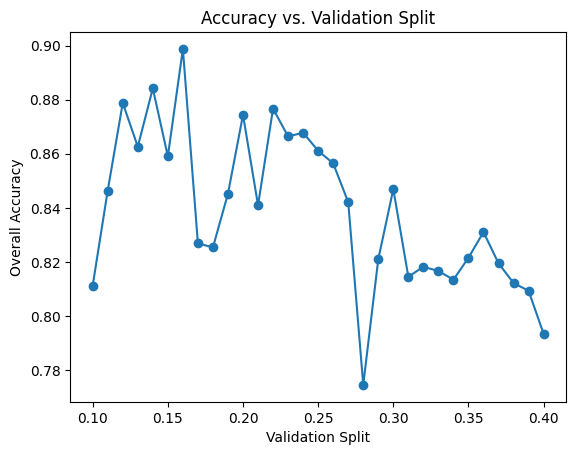

In [3]:
# Plot the accuracy vs. test size graph
plt.plot(validation_splits, accuracies, marker='o')
plt.xlabel('Validation Split')
plt.ylabel('Overall Accuracy')
plt.title('Accuracy vs. Validation Split')
plt.show()

In [4]:
# import tensorflow as tf

# model.save('/kaggle/working/cnn_original.h5')

# # Save the history to a file
# import pickle

# with open('/kaggle/working/cnn_original.pkl', 'wb') as history_file:
#     pickle.dump(history.history, history_file)

In [5]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='train_accuracy')
# plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.1, 1.2])
# plt.legend(loc='lower right')

In [6]:
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label = 'validation_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.ylim([0, 6])
# plt.legend(loc='upper right')

In [7]:
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# class_names = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# all_val_labels = []
# all_val_predictions = []

# # Evaluate the model on the validation dataset batch by batch
# for batch in val_ds:
#     val_images, val_labels_batch = batch
#     val_predictions_batch = model.predict(val_images)

#     val_labels_batch = np.array(val_labels_batch)
#     val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

#     all_val_labels.extend(val_labels_batch)
#     all_val_predictions.extend(val_predictions_batch)

# # Calculate the confusion matrix for all validation data
# conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# # Create a heatmap of the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix Heatmap (All Validation Batches)')
# plt.show()

In [8]:
# print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))